In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df = pd.read_excel('superstore_sales.xlsx')

In [3]:
df.shape

(51290, 21)

In [4]:
df.sample(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
32997,PL-2013-7380,2013-12-17,2013-12-21,Standard Class,Mike Kennedy,Consumer,Silesia,Poland,EMEA,EMEA,...,Office Supplies,Envelopes,"Cameo Clasp Envelope, Security-Tint",11.910,1,0.0,2.850,1.620,High,2013
6268,MX-2011-153969,2011-10-18,2011-10-23,Standard Class,Kristen Hastings,Corporate,León,Nicaragua,LATAM,Central,...,Office Supplies,Storage,"Eldon File Cart, Industrial",682.080,8,0.0,224.960,48.004,Medium,2011
1332,RS-2011-2200,2011-03-31,2011-04-02,Second Class,Paul Gonzalez,Consumer,Yaroslavl',Russia,EMEA,EMEA,...,Office Supplies,Paper,"SanDisk Cards & Envelopes, Multicolor",49.830,1,0.0,3.480,7.580,Medium,2011
37644,US-2014-140375,2014-05-02,2014-05-07,Second Class,Stephanie Ulpright,Home Office,Callao,Peru,LATAM,South,...,Office Supplies,Binders,"Avery Hole Reinforcements, Clear",4.644,3,0.4,-2.436,0.364,Medium,2014
9670,MO-2012-3720,2012-02-09,2012-02-15,Standard Class,Annie Thurman,Consumer,Rabat-Salé-Zemmour-Zaer,Morocco,Africa,Africa,...,Office Supplies,Binders,"Cardinal Hole Reinforcements, Clear",9.600,2,0.0,4.380,0.600,Medium,2012


In [5]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [7]:
df.groupby(['product_name']).agg({'sales': 'sum', 'quantity': 'sum', 'profit': 'sum', 'shipping_cost': 'sum'})

,sales,quantity,profit,shipping_cost
product_name,,,,
"""While you Were Out"" Message Book, One Form per Page",25.228,8,10.3880,3.10
"#10 Gummed Flap White Envelopes, 100/Box",41.300,11,16.7678,2.09
#10 Self-Seal White Envelopes,108.682,10,52.1230,11.43
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904,32,223.1408,53.03
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672,37,115.2806,34.95
...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660,24,115.6440,28.12
iOttie HLCRIO102 Car Mount,215.892,12,-11.9940,51.19
iOttie XL Car Mount,223.888,14,-50.3748,18.64


In [8]:
Subcategory_product_sales = df.groupby('sub_category')['sales'].sum().reset_index()
Subcategory_product_sales = Subcategory_product_sales.nlargest(5, 'sales')
Subcategory_product_sales

,sub_category,sales
13,Phones,1.706824e+06
6,Copiers,1.509436e+06
5,Chairs,1.501682e+06
4,Bookcases,1.466572e+06
14,Storage,1.127086e+06


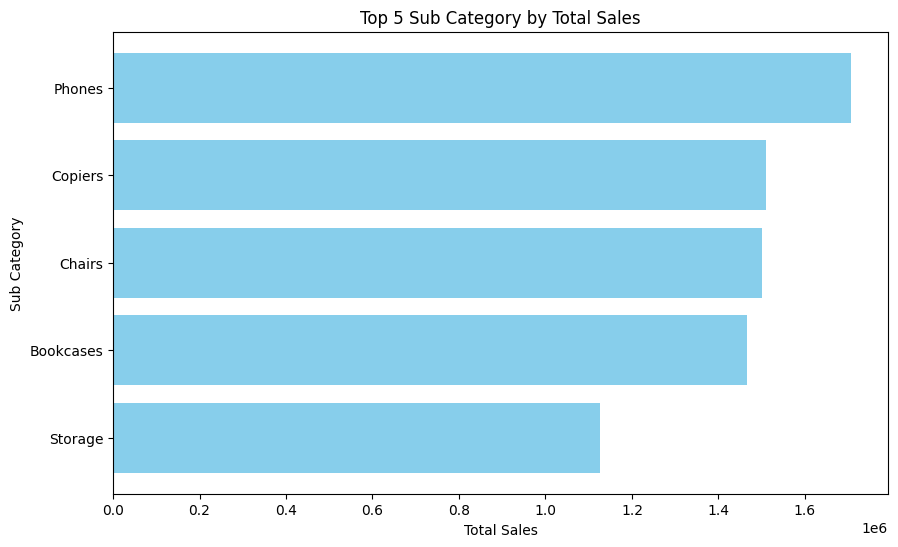

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(Subcategory_product_sales['sub_category'], Subcategory_product_sales['sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Sub Category')
plt.title('Top 5 Sub Category by Total Sales')
plt.gca().invert_yaxis()
plt.show()

In [10]:
product_name_sales = df.groupby('product_name')['sales'].sum().reset_index()
product_name_sales = product_name_sales.nlargest(5, 'sales')
product_name_sales

,product_name,sales
310,"Apple Smart Phone, Full Size",86935.7786
970,"Cisco Smart Phone, Full Size",76441.5306
2415,"Motorola Smart Phone, Full Size",73156.3030
2501,"Nokia Smart Phone, Full Size",71904.5555
866,Canon imageCLASS 2200 Advanced Copier,61599.8240


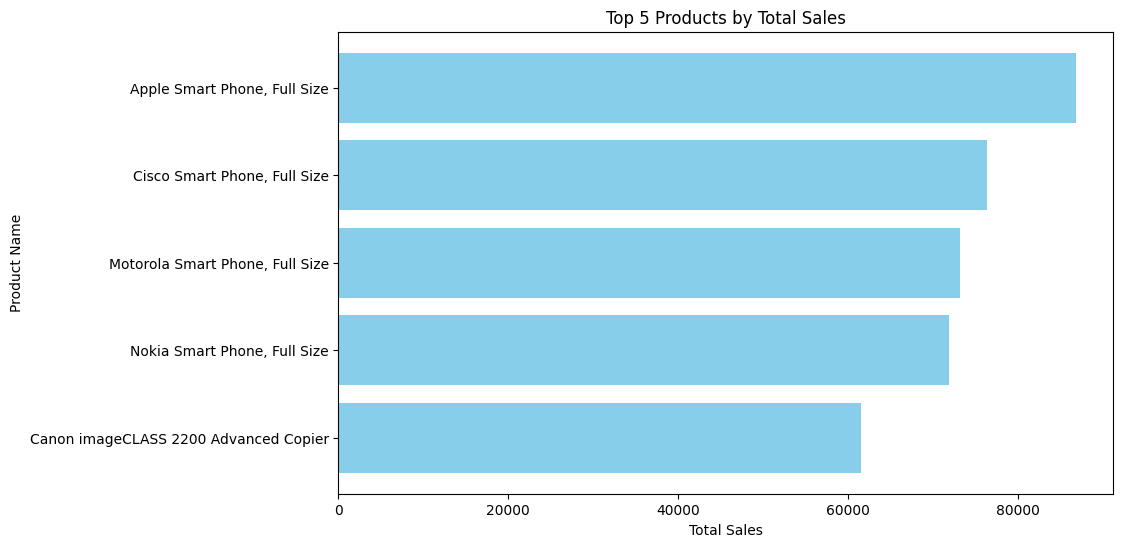

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(product_name_sales['product_name'], product_name_sales['sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.title('Top 5 Products by Total Sales')
plt.gca().invert_yaxis()
plt.show()

In [12]:
Subcategory_profit = df.groupby('sub_category')['profit'].sum().reset_index()
Subcategory_profit = Subcategory_profit.nlargest(5, 'profit')
Subcategory_profit

,sub_category,profit
6,Copiers,258567.54818
13,Phones,216717.00580
4,Bookcases,161924.41950
5,Chairs,141973.79750
1,Appliances,141680.58940


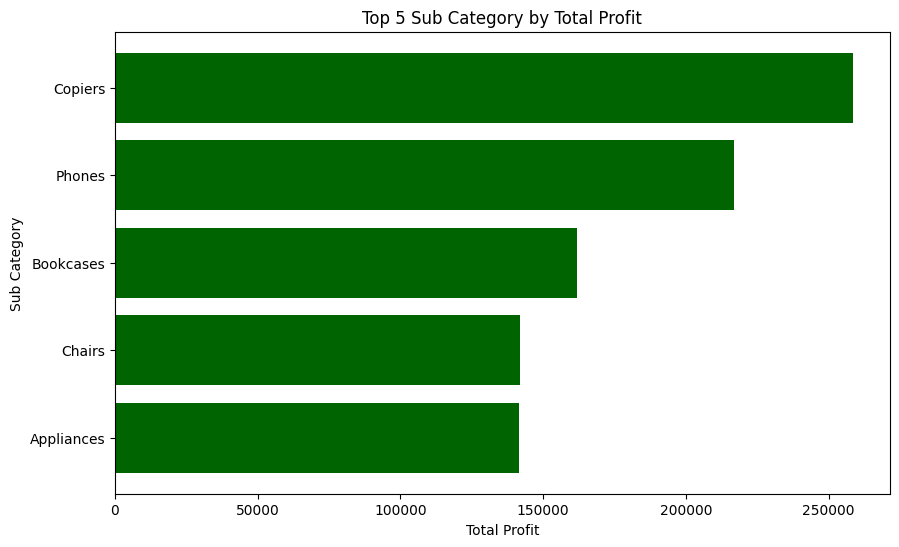

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(Subcategory_profit['sub_category'], Subcategory_profit['profit'], color='darkgreen')
plt.xlabel('Total Profit')
plt.ylabel('Sub Category')
plt.title('Top 5 Sub Category by Total Profit')
plt.gca().invert_yaxis()


In [14]:
product_name_profit = df.groupby('product_name')['profit'].sum().reset_index()
product_name_profit = product_name_profit.nlargest(5, 'profit')
product_name_profit

,product_name,profit
866,Canon imageCLASS 2200 Advanced Copier,25199.9280
970,"Cisco Smart Phone, Full Size",17238.5206
2415,"Motorola Smart Phone, Full Size",17027.1130
1926,"Hoover Stove, Red",11807.9690
3098,"Sauder Classic Bookcase, Traditional",10672.0730


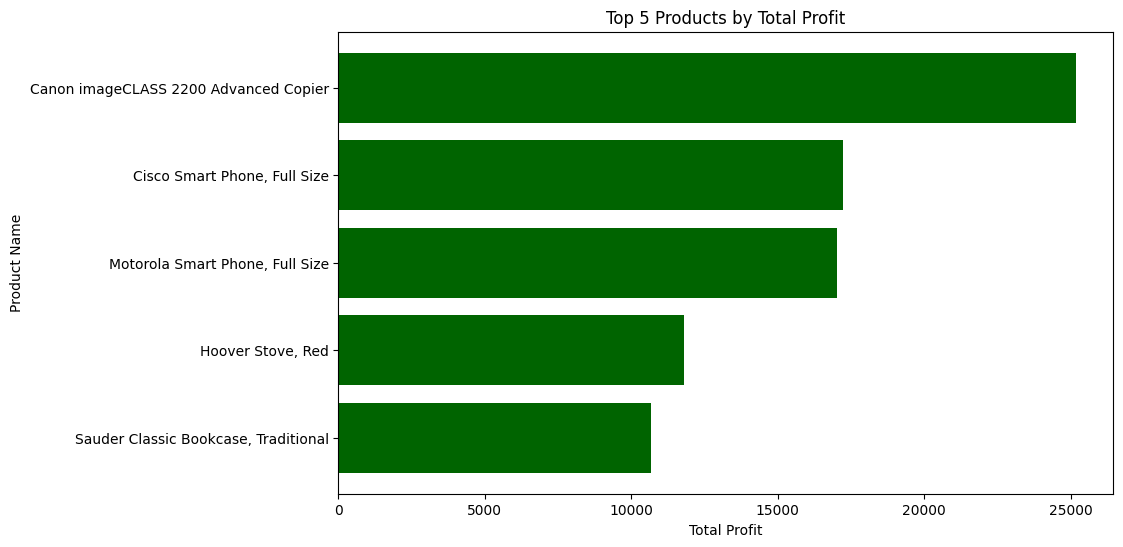

In [15]:
plt.figure(figsize=(10, 6))
plt.barh(product_name_profit['product_name'], product_name_profit['profit'], color='darkgreen')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.title('Top 5 Products by Total Profit')
plt.gca().invert_yaxis()
plt.show()

In [16]:
pd.DataFrame(df.groupby(['category', 'sub_category']).sum(numeric_only=True)['quantity'])

quantity
category        sub_category          
Furniture       Bookcases         8310
                Chairs           12336
                Furnishings      11225
                Tables            3083
Office Supplies Appliances        6078
                Art              16301
                Binders          21429
                Envelopes         8380
                Fasteners         8390
                Labels            9322
                Paper            12822
                Storage          16917
                Supplies          8543
Technology      Accessories      10946
                Copiers           7454
                Machines          4906
                Phones           11870

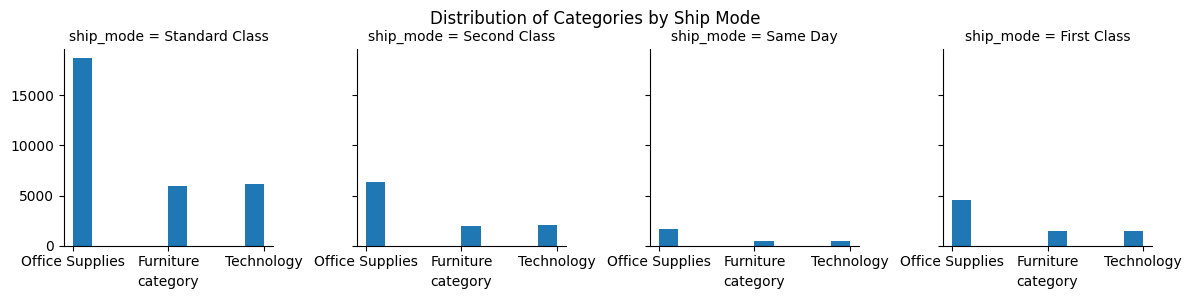

In [17]:
category_name = sns.FacetGrid(df, col='ship_mode')
category_name.map(plt.hist, 'category')
plt.subplots_adjust(top=0.85)
category_name.fig.suptitle('Distribution of Categories by Ship Mode')
plt.show()

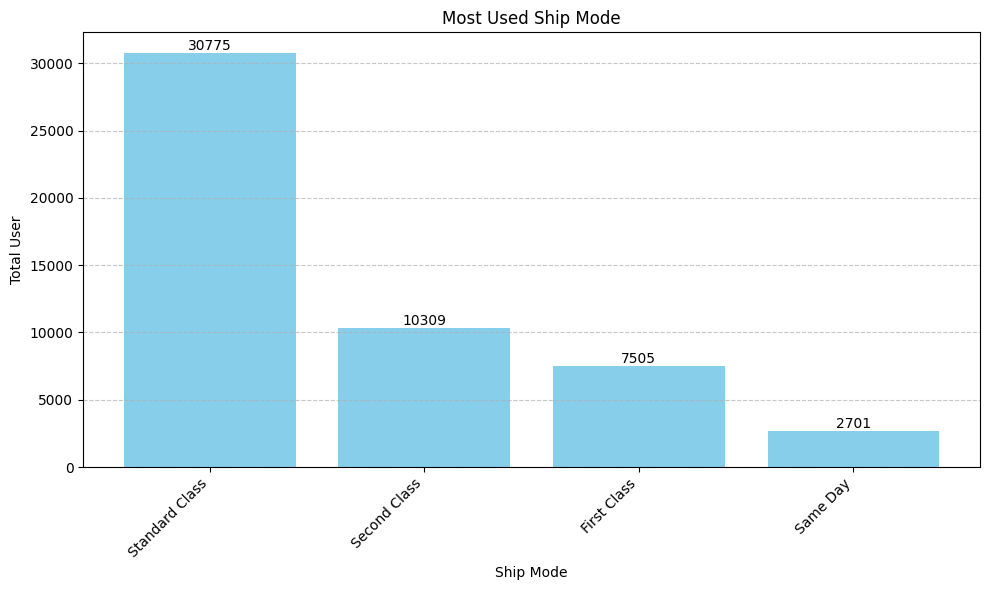

In [18]:
ship_mode_counts = df['ship_mode'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(ship_mode_counts.index, ship_mode_counts.values, color='skyblue')

plt.xlabel('Ship Mode')
plt.ylabel('Total User')
plt.title('Most Used Ship Mode')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()

In [19]:
segment_sales = df.groupby('segment')['sales'].sum().reset_index()
segment_sales = segment_sales.nlargest(3, columns= 'sales')
segment_sales

,segment,sales
0,Consumer,6.507949e+06
1,Corporate,3.824698e+06
2,Home Office,2.309855e+06


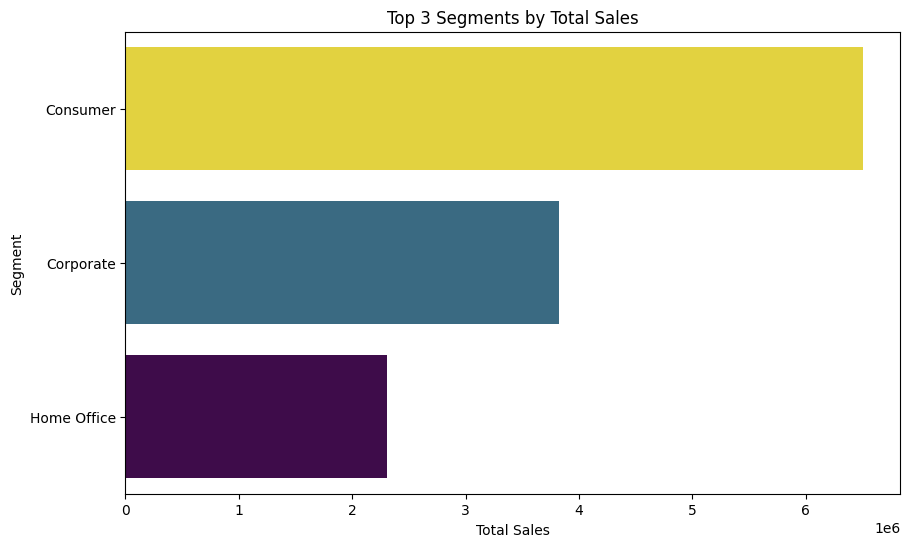

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='segment', data=segment_sales, hue='sales', palette='viridis', legend=False)
plt.xlabel('Total Sales')
plt.ylabel('Segment')
plt.title('Top 3 Segments by Total Sales')
plt.show()

In [21]:
segment_profit = df.groupby('segment')['profit'].sum().reset_index()
segment_profit = segment_profit.nlargest(3, columns= 'profit')
segment_profit

,segment,profit
0,Consumer,749239.78206
1,Corporate,442785.85866
2,Home Office,277009.18056


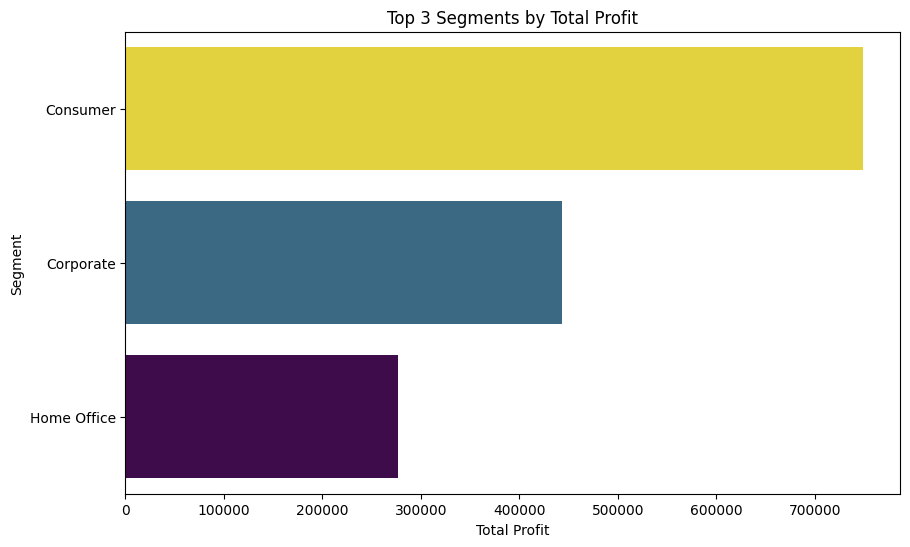

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='profit', y='segment', data=segment_profit, hue='profit', palette='viridis', legend=False)
plt.xlabel('Total Profit')
plt.ylabel('Segment')
plt.title('Top 3 Segments by Total Profit')
plt.show()

In [23]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [24]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
dtype: object

In [25]:
profit_by_year = df.groupby('year')['profit'].sum()

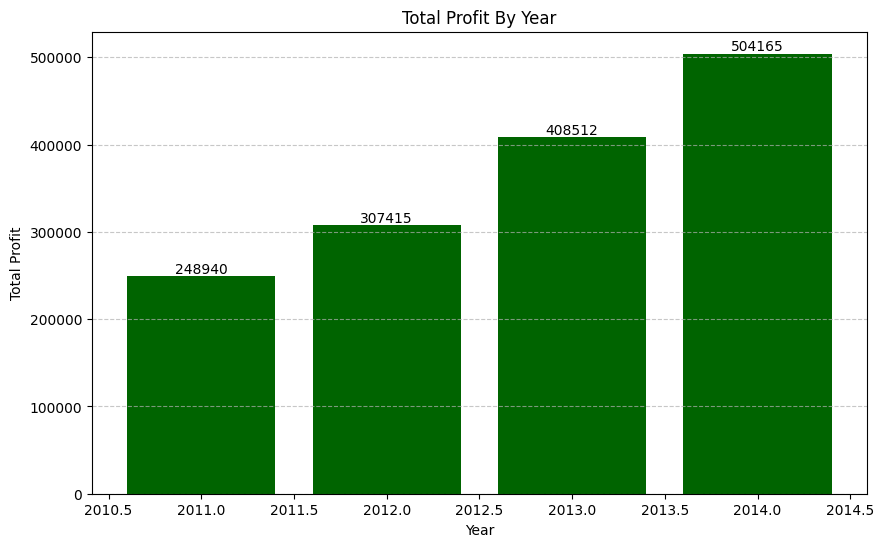

In [26]:
plt.figure(figsize=(10, 6))
bars = plt.bar(profit_by_year.index, profit_by_year.values, color='darkgreen')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit By Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [27]:
sales_by_year = df.groupby(df['year'])['sales'].sum()

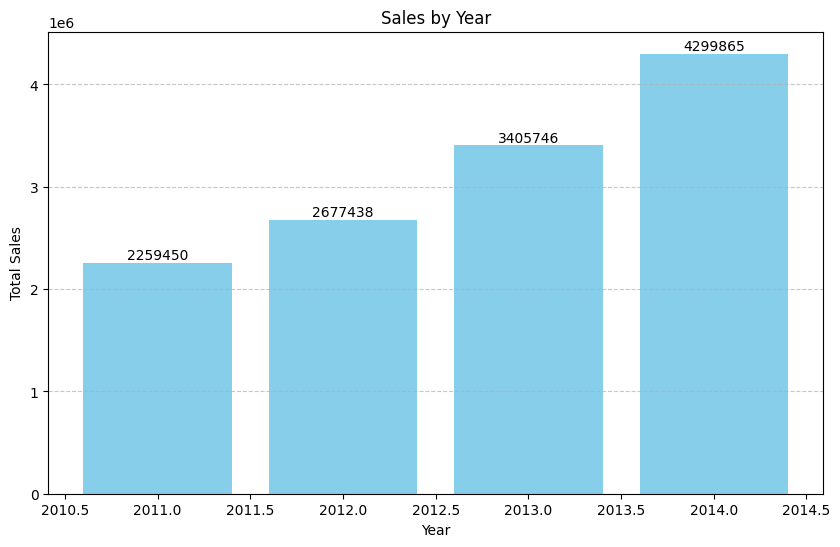

In [28]:
plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_year.index, sales_by_year.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [29]:
profit_by_country = df.groupby('country')['profit'].sum().reset_index()
top_profit_by_country = profit_by_country.nlargest(10, 'profit')
top_profit_by_country

,country,profit
139,United States,286397.02170
26,China,150683.08500
57,India,129071.83500
138,United Kingdom,111900.15000
44,France,109029.00300
47,Germany,107322.82050
6,Australia,105484.96300
81,Mexico,102818.09752
119,Spain,54390.12000
38,El Salvador,42023.24320


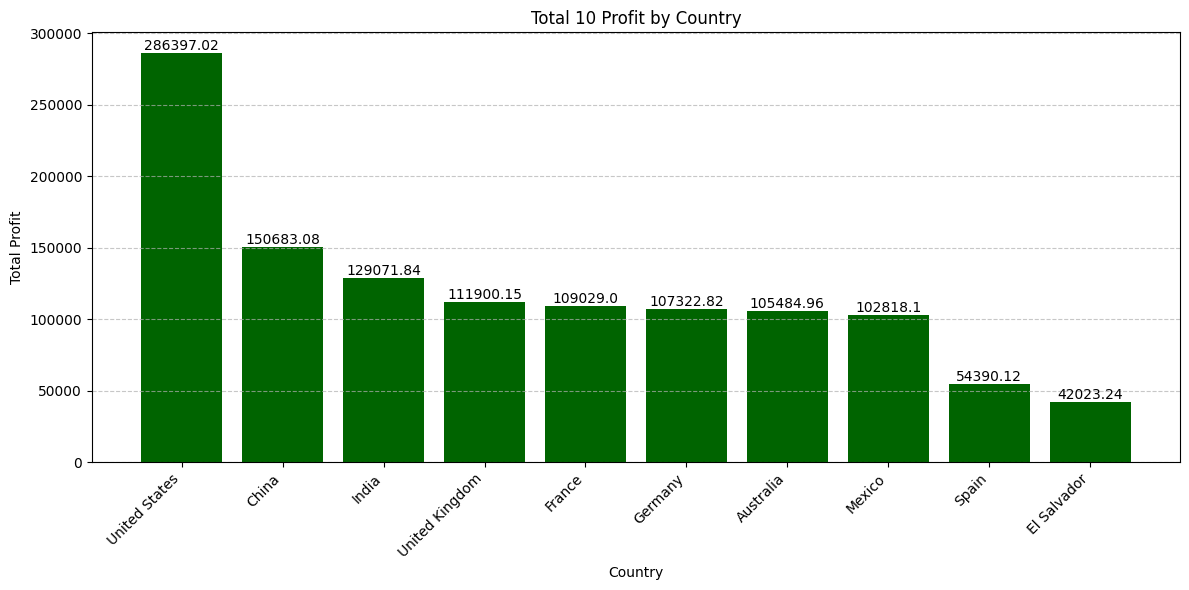

In [30]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top_profit_by_country['country'], top_profit_by_country['profit'], color='darkgreen')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.title('Total 10 Profit by Country')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()

In [31]:
sales_by_country = df.groupby('country')['sales'].sum().reset_index()
top_sales_by_country = sales_by_country.nlargest(10, 'sales')

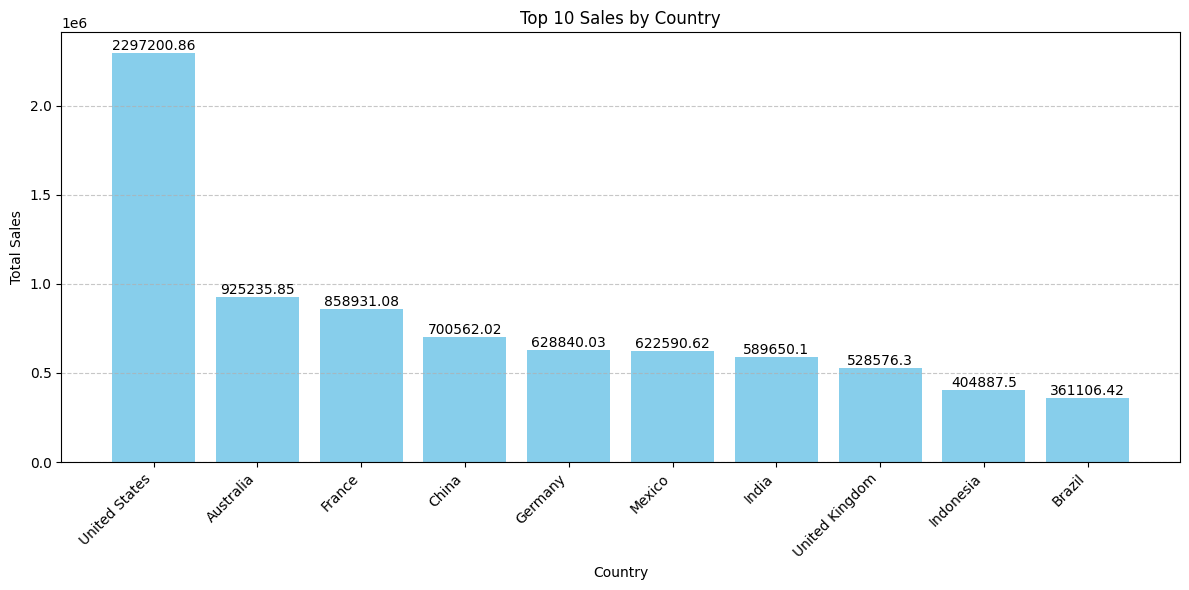

In [32]:
plt.figure(figsize=(12, 6))
bars = plt.bar(top_sales_by_country['country'], top_sales_by_country['sales'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Top 10 Sales by Country')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()

In [33]:
#RFM Analysis
recency = df.groupby('customer_name')['order_date'].max().reset_index()
recency['recency'] = (df['order_date'].max() - recency['order_date']).dt.days

frequency = df.groupby('customer_name')['order_id'].nunique().reset_index()
frequency.columns = ['customer_name', 'frequency']

monetary = df.groupby('customer_name')['sales'].sum().reset_index()
monetary.columns = ['customer_name', 'monetary']

rfm = pd.merge(recency, frequency, on='customer_name')
rfm = pd.merge(rfm, monetary, on='customer_name')

print(rfm.head())

     customer_name order_date  recency  frequency     monetary
0    Aaron Bergman 2014-12-15       16         37  24644.62750
1    Aaron Hawkins 2014-12-19       12         34  20759.51384
2   Aaron Smayling 2014-12-08       23         31  14212.62840
3  Adam Bellavance 2014-11-26       35         41  20186.77840
4        Adam Hart 2014-12-29        2         42  21718.20142


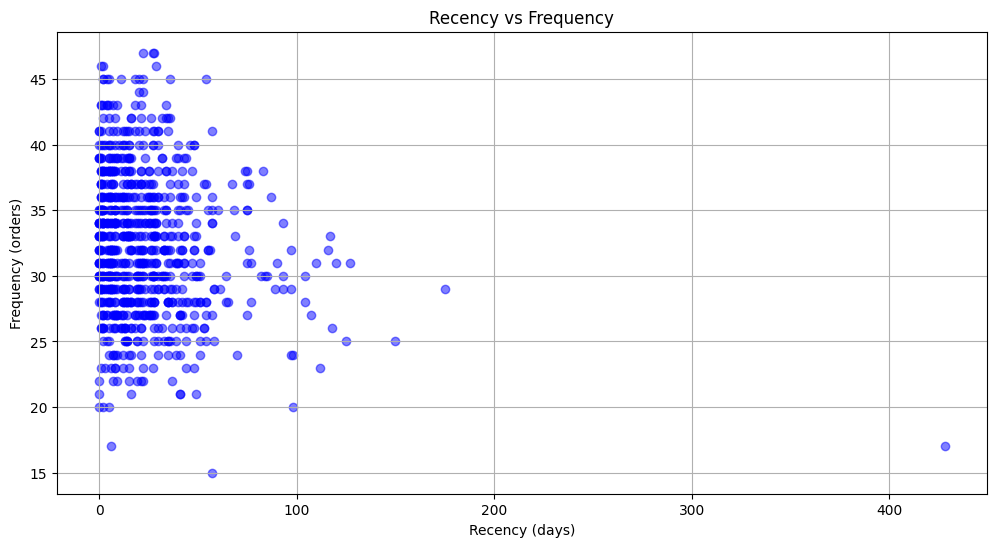

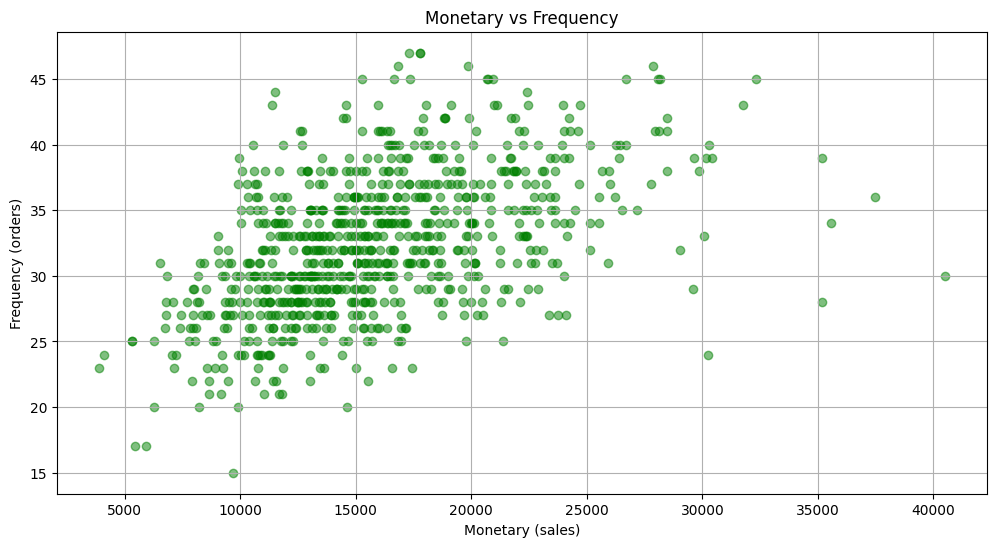

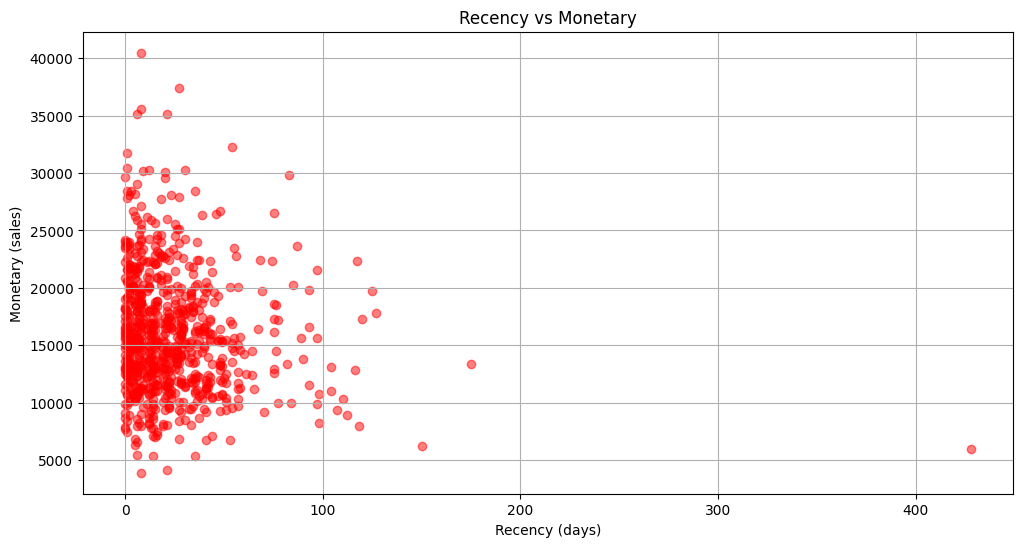

In [34]:
# Plot Recency vs Frequency
plt.figure(figsize=(12, 6))
plt.scatter(rfm['recency'], rfm['frequency'], color='blue', alpha=0.5)
plt.xlabel('Recency (days)')
plt.ylabel('Frequency (orders)')
plt.title('Recency vs Frequency')
plt.grid(True)
plt.show()

# Plot Monetary vs Frequency
plt.figure(figsize=(12, 6))
plt.scatter(rfm['monetary'], rfm['frequency'], color='green', alpha=0.5)
plt.xlabel('Monetary (sales)')
plt.ylabel('Frequency (orders)')
plt.title('Monetary vs Frequency')
plt.grid(True)
plt.show()

# Plot Recency vs Monetary
plt.figure(figsize=(12, 6))
plt.scatter(rfm['recency'], rfm['monetary'], color='red', alpha=0.5)
plt.xlabel('Recency (days)')
plt.ylabel('Monetary (sales)')
plt.title('Recency vs Monetary')
plt.grid(True)
plt.show()